In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns

TEAMNAME = 'Toshiba Brave Lupus Tokyo'

df = pd.read_csv("/Users/isakakou/Desktop/931097_SUNTvTOSH_BI.csv",encoding='latin1')
df.columns
df[['playerName', 'teamName','x_coord','y_coord','x_coord_end','y_coord_end',
    'actionName','ActionTypeName','ActionResultName','qualifier3Name',
    'qualifier4Name','qualifier5Name','Metres','PlayNum',
    'SetNum','sequence_id','playerpositionName','refereeName','assistantreferee1Name','assistantreferee2Name']]
print(df[['teamName']])

                       teamName
0              Tokyo Sungoliath
1              Tokyo Sungoliath
2     Toshiba Brave Lupus Tokyo
3     Toshiba Brave Lupus Tokyo
4              Tokyo Sungoliath
...                         ...
2840           Tokyo Sungoliath
2841           Tokyo Sungoliath
2842           Tokyo Sungoliath
2843           Tokyo Sungoliath
2844           Tokyo Sungoliath

[2845 rows x 1 columns]


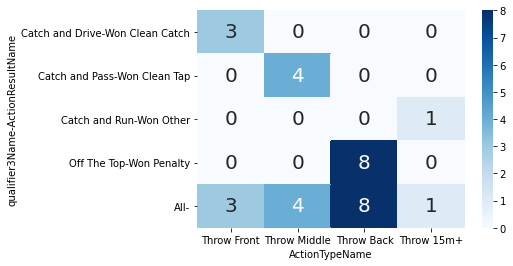

<Figure size 432x288 with 0 Axes>

In [2]:
#チーム名指定でラインアウトデータ取得
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']
b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b = b.reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'])

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

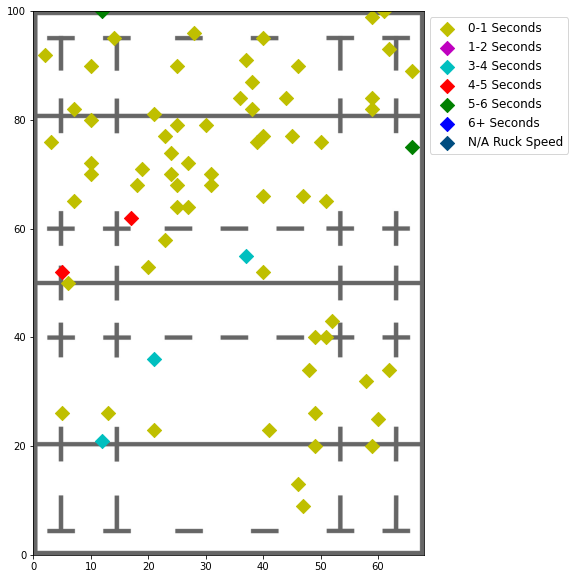

In [3]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Ruck']
rspeed = ['0-1 Seconds','1-2 Seconds','3-4 Seconds','4-5 Seconds','5-6 Seconds','6+ Seconds', "N/A Ruck Speed"]
cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

for i in range(len(rspeed)):
    r = dfaction.loc[dfaction['qualifier4Name'] == rspeed[i]]
    plt.scatter(r['y_coord'], r["x_coord"], label=rspeed[i] ,marker = 'D',color=cl[i], s=100)

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.gcf().subplots_adjust(wspace=4)


            playerName  x_coord_end ActionTypeName
10      Takahiro Ogawa           52            Box
335     Takahiro Ogawa           36            Box
353     Takahiro Ogawa           70            Box
359       Hayata Nakao           18     Touch Kick
443       Hayata Nakao           39     Touch Kick
449     Takahiro Ogawa           57            Box
580       Hayata Nakao           52     Touch Kick
622     Takahiro Ogawa           43            Box
693       Hayata Nakao           84    Territorial
817       Hayata Nakao           67           Chip
838       Hayata Nakao           89     Touch Kick
942       Hayata Nakao           95     Touch Kick
1090      Hayata Nakao           58    Territorial
1177    Takahiro Ogawa           71            Box
1253      Nik McCurran           42    Territorial
1392      Hayata Nakao           90     Touch Kick
1468      Hayata Nakao           95     Touch Kick
1496    Takahiro Ogawa           44            Box
1625      Hayata Nakao         

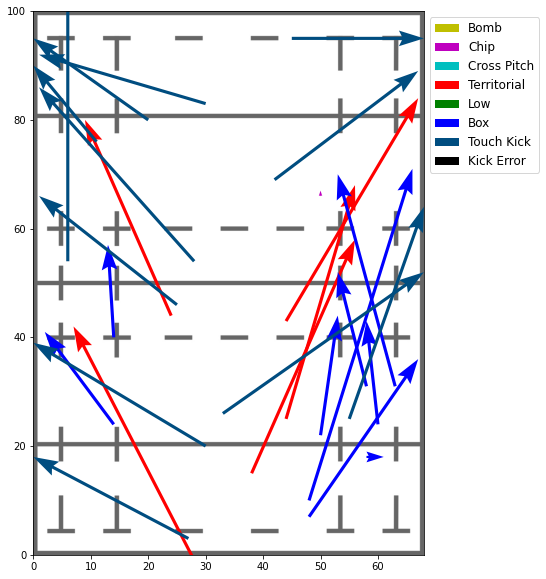

In [4]:
#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks =  dfaction.loc[(dfaction['qualifier3Name'] =='Kick in Play') | (dfaction['qualifier3Name'] == 'Kick in Play (Own 22)')]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

print(dfaction[['playerName','x_coord_end','ActionTypeName']])
for i in range(len(kicktypes)):
    plts = dfaction.loc[dfaction['ActionTypeName']== kicktypes[i]]
    plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
#Kickの処理ここまで------

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.gcf().subplots_adjust(wspace=4)

In [5]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]
dfaction = dfaction.loc[dfaction['actionName'] == 'Tackle']
dfaction[['playerName','actionName','ActionResultName','ActionTypeName','qualifier3Name','qualifier4Name','qualifier5Name']]

,playerName,actionName,ActionResultName,ActionTypeName,qualifier3Name,qualifier4Name,qualifier5Name
14,Masataka Mikami,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
16,Jacob Pierce,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
26,Michael Leitch,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
41,Jone Naikabula,Tackle,Pen Conceded,Edge Tackle,NaN,NaN,NaN
42,Takahiro Ogawa,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
...,...,...,...,...,...,...,...
2779,Yoshitaka Tokunaga,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
2781,Jacob Pierce,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
2793,Nik McCurran,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
2806,Yu Chinen,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN


In [11]:
#TODO エリアごとにラインアウトを整理する
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Catch']

areas = ['0-22', '22-50','50-22','22-100']
Metres_for_area = [0,22,50,73,100]

for i in range(len(areas)):
    dfaction = dfaction.loc[dfaction['Metres'] <= Metres_for_area[i+1] & dfaction['Metres'] >= Metres_for_area[i]]
    b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b
#     b = b.reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'])

#     plt.gcf().subplots_adjust(wspace=4)
#     sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
#     plt.show()
#     plt.clf()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().